# Question 1

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [4]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Replaing Sex and Embarked with numerical values
df_train['Sex'] = df_train['Sex'].replace(["female", "male"],[0, 1])
df_train['Embarked'] = df_train['Embarked'].replace(['S', 'C', 'Q'],[1, 2, 3])

In [7]:
matrix = df_train.corr()
print(matrix)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age             0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   
Embarked       -0.030555  0.108669  0.043835 -0.118593  0.012186 -0.060606   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658 -0.030555  
Survived     0.081629  0.257307  0.108669  
Pclass       0.018443 -0.549500  0.043835  
Sex         -0.245489 -0.182333 -0.118593  

In [8]:
df_train.corr().style.background_gradient(cmap="Reds")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.030555
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.118593
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.063462
Embarked,-0.030555,0.108669,0.043835,-0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


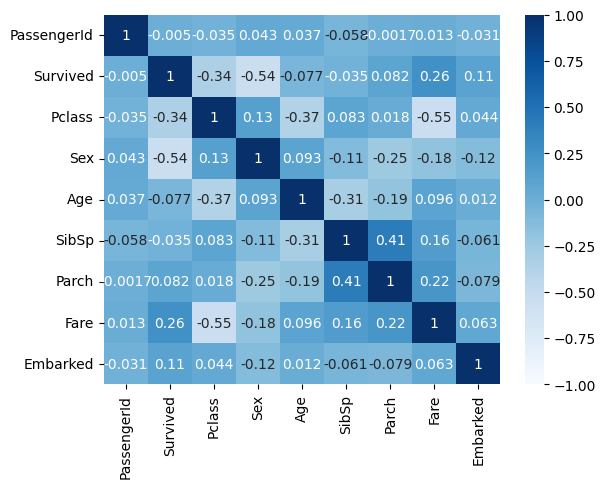

In [9]:
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='Blues')
plt.show()

We need to keep the "Sex" feature because it has high correlation with survived which is the feature which is to be found

<AxesSubplot: xlabel='Survived', ylabel='Count'>

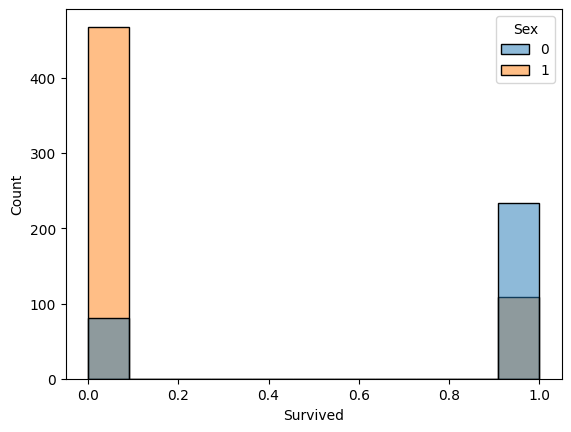

In [10]:
sns.histplot(data=df_train, x="Survived", hue="Sex")

In [33]:
#NAive bais

train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

# Join data to analyse and process the set as one.
train_raw['train'] = 1
test_raw['train'] = 0
df = train_raw.append(test_raw, sort=False)




features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

df = df[features + [target] + ['train']]
# Categorical values need to be transformed into numeric.
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
train = df.query('train == 1')
test = df.query('train == 0')


In [34]:

# Drop missing values from the train set.
train.dropna(axis=0, inplace=True)
labels = train[target].values


train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)


In [13]:
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)

In [31]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

%matplotlib inline
# Suppress warnings
warnings.filterwarnings("ignore")

In [15]:
classifier = GaussianNB()

classifier.fit(X_train, Y_train)

GaussianNB()

In [16]:
y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80        85
         1.0       0.70      0.69      0.70        58

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.75       143
weighted avg       0.75      0.76      0.75       143

[[68 17]
 [18 40]]
accuracy is 0.7552447552447552


# Question 2

In [20]:
glass=pd.read_csv("glass.csv")
X= glass.drop(['Type'],axis=1)
Y=glass['Type']

In [18]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
classifier.fit(X,Y)
Y_predc = classifier.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
print('Accuracy is ',accuracy_score(Y_test, Y_predc))

Accuracy is  0.4186046511627907


In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predc))

              precision    recall  f1-score   support

           1       0.27      0.67      0.39         9
           2       0.00      0.00      0.00        19
           3       0.43      0.60      0.50         5
           5       0.33      0.50      0.40         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.42        43
   macro avg       0.45      0.63      0.51        43
weighted avg       0.29      0.42      0.33        43



In [25]:
from sklearn.svm import SVC

In [26]:
svc = SVC(max_iter=1000)
X_trainsvc, X_testsvc, Y_trainsvc, Y_testsvc = train_test_split(X, Y, test_size = 0.2, random_state = 0)
svc.fit(X_trainsvc, Y_trainsvc)

Y_predcsvc = svc.predict(X_testsvc)

In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy is ', accuracy_score(Y_testsvc, Y_predcsvc))

Accuracy is  0.20930232558139536


In [28]:
print(classification_report(Y_testsvc, Y_predc))

              precision    recall  f1-score   support

           1       0.27      0.67      0.39         9
           2       0.00      0.00      0.00        19
           3       0.43      0.60      0.50         5
           5       0.33      0.50      0.40         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.42        43
   macro avg       0.45      0.63      0.51        43
weighted avg       0.29      0.42      0.33        43



In [29]:
matrix = glass.corr()
print(matrix)

            RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na   -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg   -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al   -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si   -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K    -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca    0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba   -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe    0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   
Type -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054  0.000952   

            Ba        Fe      Type  
RI   -0.000386  0.143010 -0.164237  
Na    0.326603 -0.241346  0.502898  
Mg   -0.492262  0.083060 -0.74

<AxesSubplot: >

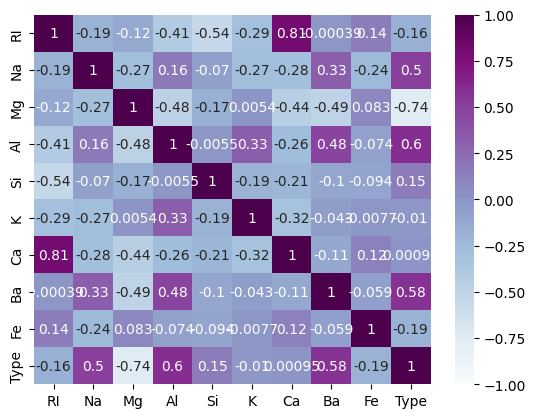

In [30]:
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap="BuPu")

Naive bayes has more accuracy than the support vector machine from the above because the features given are independent and their is no linear seperation boundary

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4d91d06a-9c05-454b-9a59-9a2a13ee4763' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>